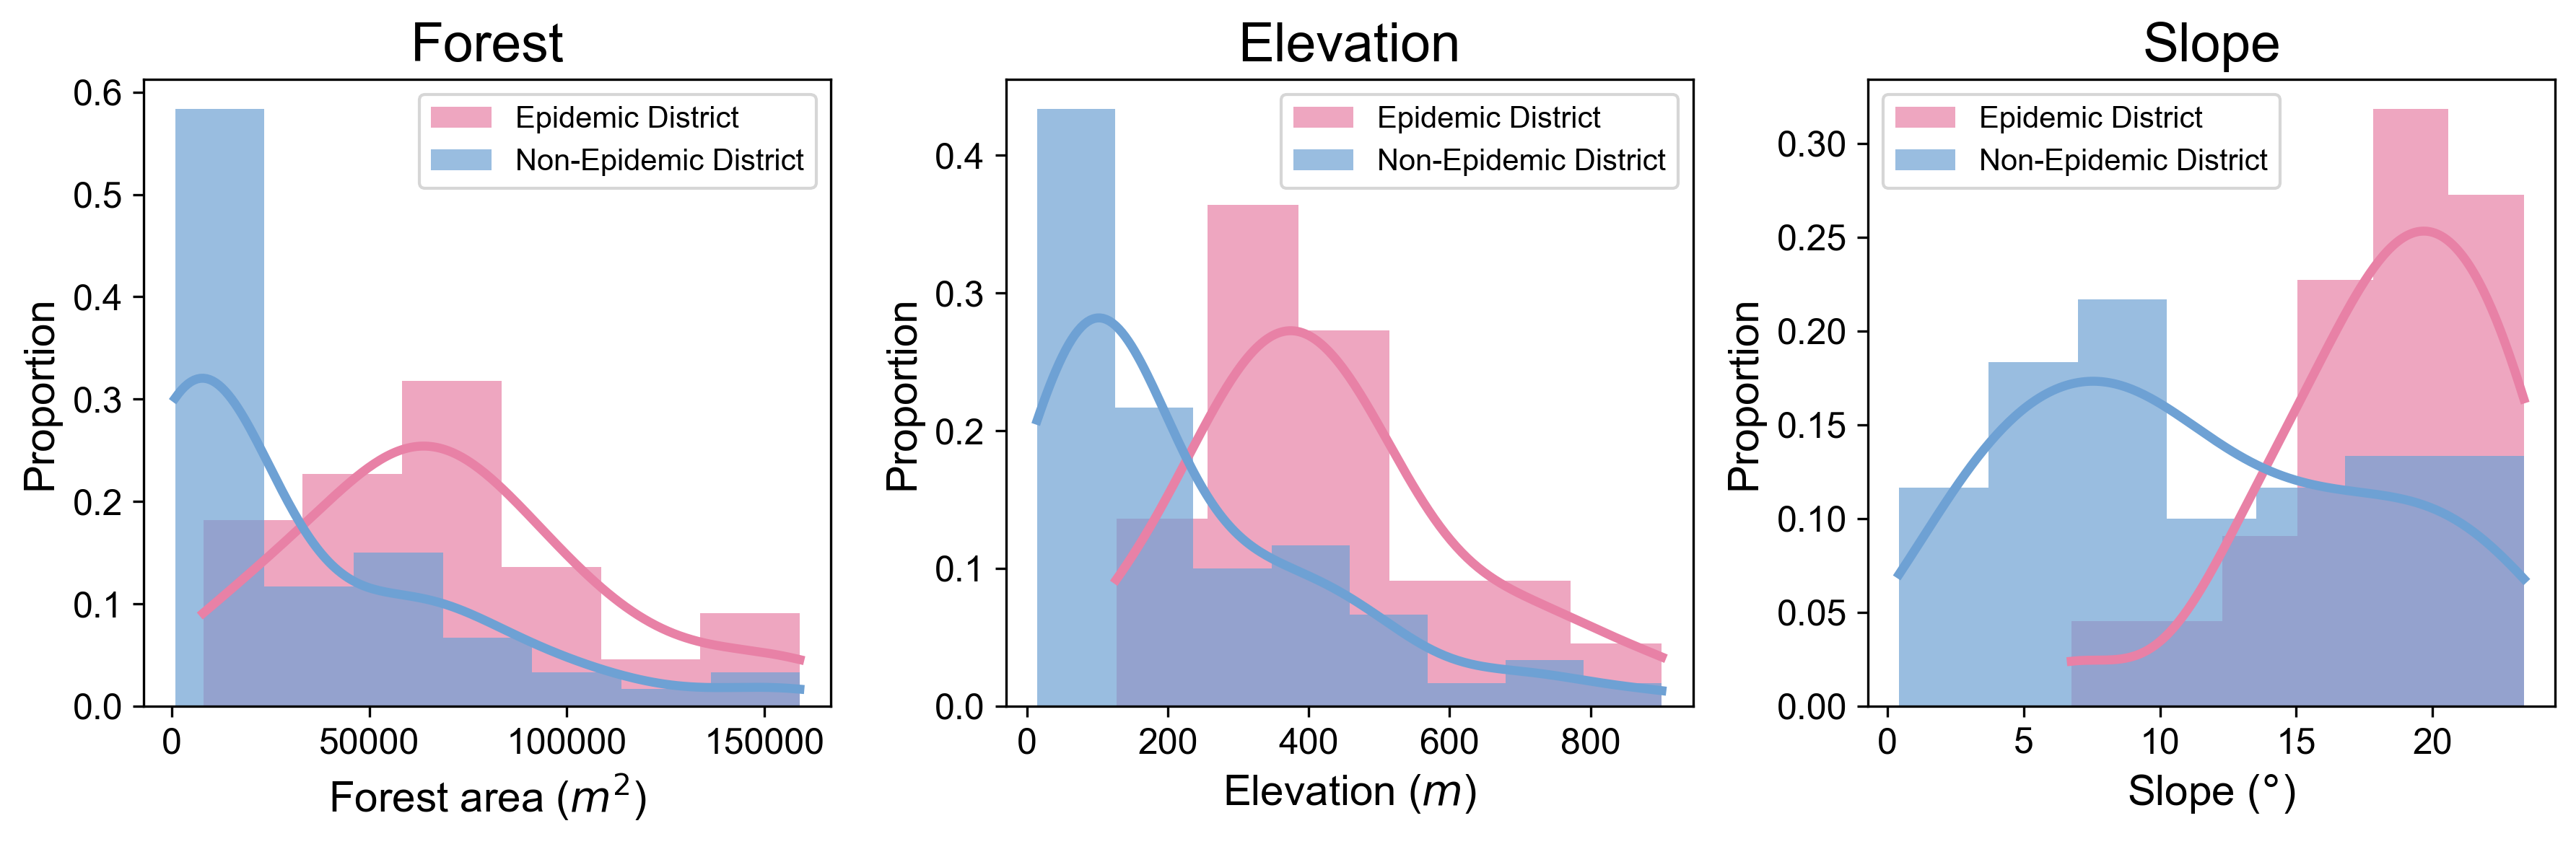

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import os

os.chdir("../Data")

file_name = '경기강원_상하반기.xlsx'

plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8

color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

data = pd.read_excel(file_name)

full_asf_regions = data.loc[data['NUMPOINTS'] > 5, 'SIG_ENG_NM_x'].unique()
asf_regions = data.loc[data['NUMPOINTS'] > 0, 'SIG_ENG_NM_x'].unique()
asf_not_regions = data.loc[data['NUMPOINTS'] == 0, 'SIG_ENG_NM_x'].unique()

full_asf_df = data.loc[data['SIG_ENG_NM_x'].isin(full_asf_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')
asf_df = data.loc[data['SIG_ENG_NM_x'].isin(asf_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')
asfnot_df = data.loc[data['SIG_ENG_NM_x'].isin(asf_not_regions), ['SIG_ENG_NM_x', 'forest', 'dem', 'slope', 'x', 'y', 'farm_cnt']].sort_values(by='SIG_ENG_NM_x')


group1 = asf_df.drop_duplicates()
group2 = asfnot_df.drop_duplicates()
group3 = full_asf_df.drop_duplicates()

index1 = np.arange(len(group1))
index2 = np.arange(len(group1), len(group1)+len(group2))
index3 = np.arange(len(group1)+len(group2), len(group1)+len(group2)+len(group3))

group1.index = index1
group2.index = index2
group3.index = index3

fig, ax = plt.subplots(1, 3, dpi = set_dpi, figsize = (12, 4))
ax = ax.ravel()
ax1 = ax[0]; ax2 = ax[1]; ax3 = ax[2]

sns.histplot(group1['forest'], ax = ax1, color = color_vs[0], alpha = 0.7, label = 'Epidemic District', 
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
sns.histplot(group2['forest'], ax = ax1, color = color_vs[1], alpha = 0.7, label = 'Non-Epidemic District', 
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
ax1.set_xlabel(r'Forest area ($m^2$)', fontsize = label_size)
ax1.set_ylabel('Proportion', fontsize = label_size)
ax1.set_title('Forest', fontsize = title_size)
ax1.legend(fontsize=10)

sns.histplot(group1['dem'], ax = ax2, color = color_vs[0], alpha = 0.7, label = 'Epidemic District',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
sns.histplot(group2['dem'], ax = ax2, color = color_vs[1], alpha = 0.7, label = 'Non-Epidemic District',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
ax2.set_xlabel(r'Elevation ($m$)', fontsize = label_size)
ax2.set_ylabel('Proportion', fontsize = label_size)
ax2.set_title('Elevation', fontsize = title_size)
ax2.legend(fontsize=10)

sns.histplot(group1['slope'], ax = ax3, color = color_vs[0], alpha = 0.7, label = 'Epidemic District',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
sns.histplot(group2['slope'], ax = ax3, color = color_vs[1], alpha = 0.7, label = 'Non-Epidemic District',
                kde=True, fill=True, edgecolor=None, stat='proportion', line_kws={'lw':3})
ax3.set_xlabel(r'Slope ($\degree$)', fontsize = label_size)
ax3.set_ylabel('Proportion', fontsize = label_size)
ax3.set_title('Slope', fontsize = title_size)
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()